# Integrated Hydrology

This is a series of problems to test and demonstrate the integrated hydrology components of ATS.  Integrated hydrology consists of Richards equation in the subsurface coupled to a diffusion wave approximation on the surface system.  Coupling is done through assuming continuous pressure and flux across the surface-subsurface interface.

Tests demonstrate a 1D column (showing dry-to-wet and wet-to-dry transitions), a 2D "open book" problem (showing that water flows down hill) and a typical 2D "hillslope" problem comparable to the Sulis et al (WRR) benchmark problems.

Author: Ethan Coon

In [6]:
%matplotlib inline

In [7]:
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'docs', 'documentation', 'source', 'ats_demos'))

import ats_xdmf
import plot_column_data

import colors
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colorbar
import pandas
import run_demos

## Example 1: 1D infiltration

In the first example, we rain on a column for half a day, then turn off the rain.  A continuous, constant baseflow is applied as a sink at the bottom of the column.  Initially the column is partially saturated.  As rainfall > baseflow, the column saturates and ponded water expresses on the surface.  After rainfall stops, baseflow takes the water table below the surface again. 

This demonstrates the dry-to-wet and wet-to-dry transitions.

Note: rainfall rate is in `m/s` while baseflow is in `mol/s`! To convert from `mol/s` to `m/s`, we need water molar density (typically 55389 []) and cell area (e.g., 1 [m^2]).

E.g., to get baseflow in [m/s]
$$
0.04 [mol/s] / 55389 [mol/m^3] / 1 [m^2] = 7.2e-07 [m/s]
$$

In [8]:
# load the ATS solution
directory = "column_exfiltration/"
vis = ats_xdmf.VisFile(directory, time_unit='d')
vis.loadMesh(columnar=True)

vis_surf = ats_xdmf.VisFile(directory, domain='surface', time_unit='d')
vis.loadMesh(columnar=True)


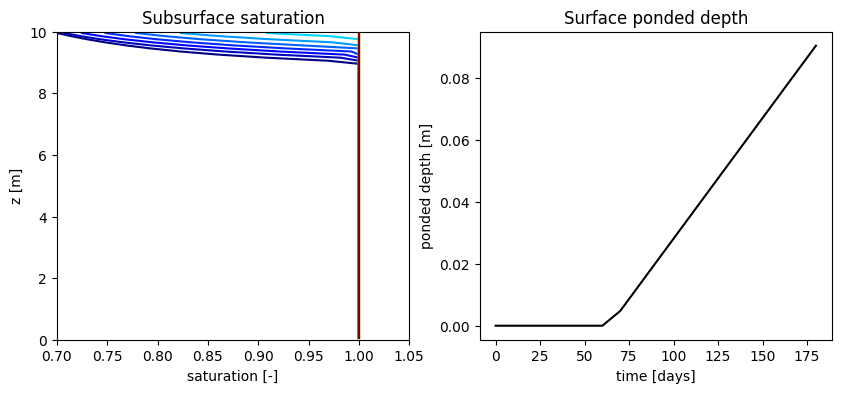

In [9]:
# plot the solution
fig, axs = plt.subplots(1,2, figsize=(10,4))

plot_column_data.plot_subsurface(vis, ['saturation_liquid',], axs[0], None, cmap='jet')
axs[0].set_xlabel('saturation [-]')
axs[0].set_ylabel('z [m]')
axs[0].set_xlim(0.7,1.05)
axs[0].set_ylim(0,10)
axs[0].set_title('Subsurface saturation')

plot_column_data.plot_surface(vis_surf, ['ponded_depth',], axs[1], 'ponded depth [m]','k')
axs[1].set_xlabel("time [days]")
axs[1].set_ylabel("ponded depth [m]")
axs[1].set_title('Surface ponded depth')
plt.savefig('HW9_Q1.png', dpi = 1200)
plt.show()